In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data1.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
print("Shape of dataset:", df.shape)
df.info()

df.isnull().sum()

df.describe()

Shape of dataset: (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.dropna(subset=['CustomerID'], inplace=True)
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

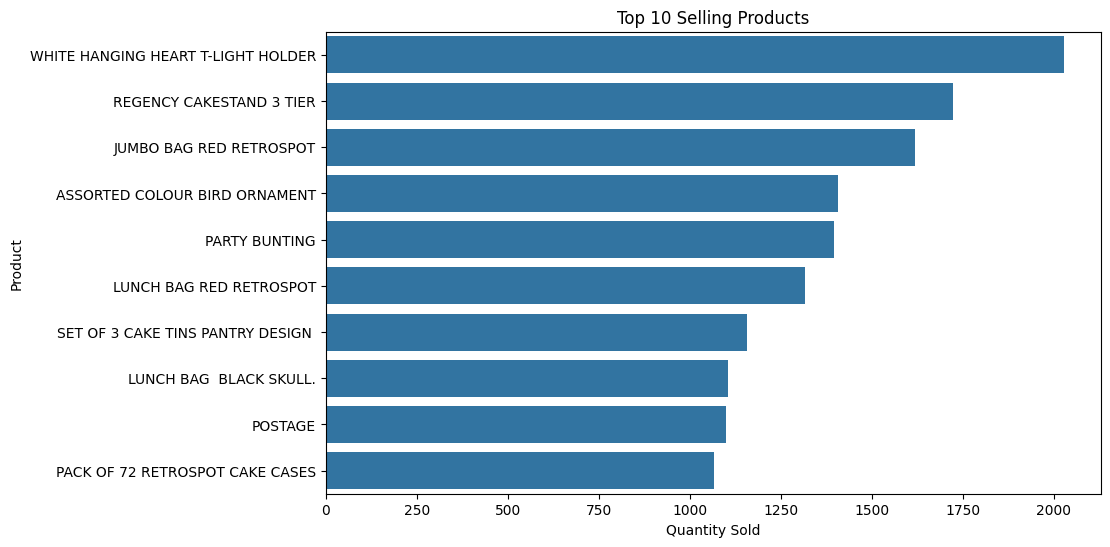

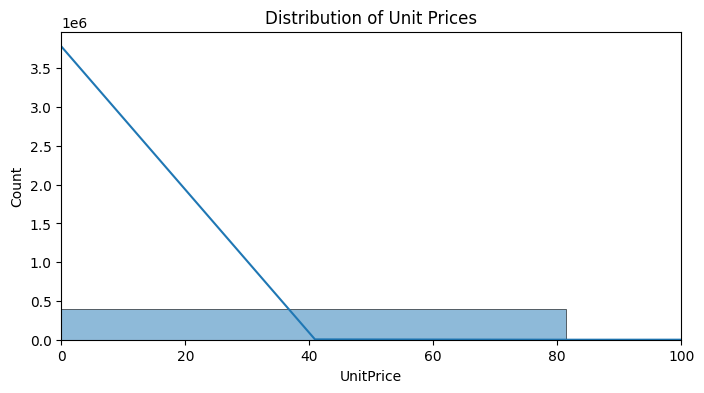

In [5]:
# Top 10 selling products
top_products = df['Description'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

# Histogram of Unit Price
plt.figure(figsize=(8,4))
sns.histplot(df['UnitPrice'], bins=100, kde=True)
plt.xlim(0,100)
plt.title('Distribution of Unit Prices')
plt.show()

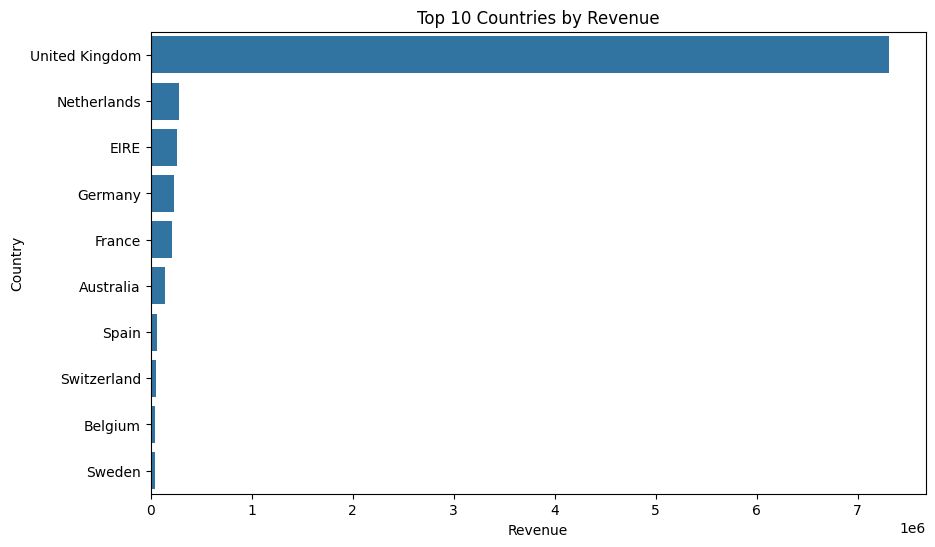

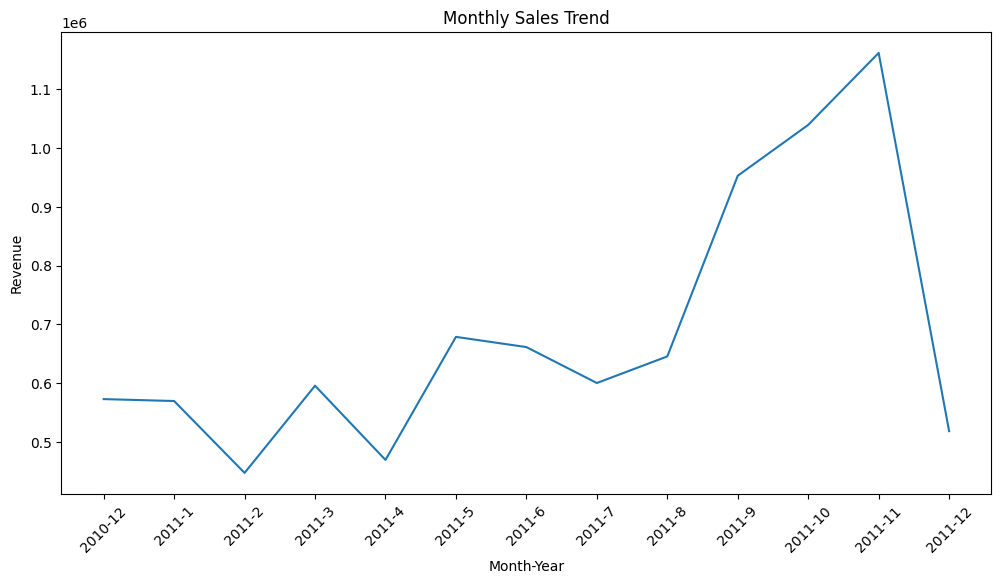

In [6]:
# Revenue per country
rev_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=rev_country.values, y=rev_country.index)
plt.title('Top 10 Countries by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.show()

# Revenue by month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

monthly_sales = df.groupby(['Year','Month'])['TotalPrice'].sum().reset_index()
monthly_sales['Period'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x='Period', y='TotalPrice', data=monthly_sales)
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue')
plt.xlabel('Month-Year')
plt.show()

Avg Orders per Customer: 4.271952062687255


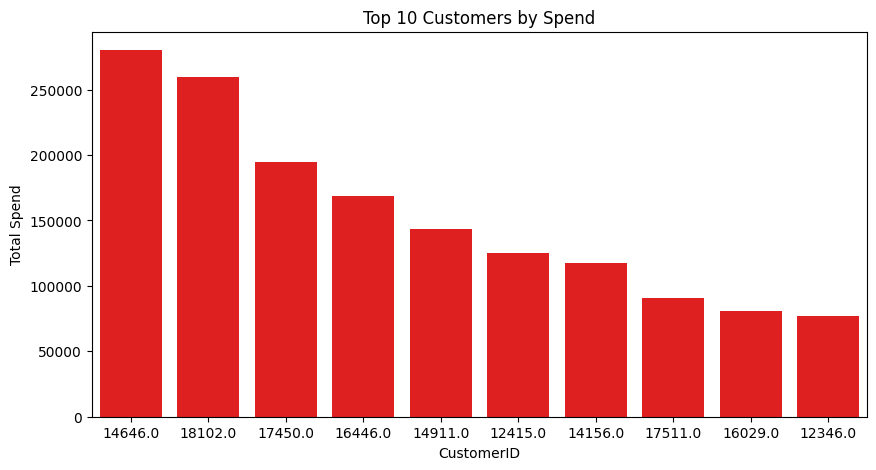

In [12]:
# Total Orders per Customer
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
print("Avg Orders per Customer:", orders_per_customer.mean())

# Total spend per customer
customer_value = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=customer_value.index.astype(str), y=customer_value.values, color="red")
plt.title('Top 10 Customers by Spend')
plt.ylabel('Total Spend')
plt.xlabel('CustomerID')
plt.show()

Key EDA Insights:
- Most sales come from a few popular products.
- A large chunk of revenue is generated by a few high-value customers.
- The UK contributes the most to total sales.
- Canceled orders and missing customer IDs were cleaned.
- Monthly revenue trends can inform seasonal marketing strategies.